In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("F:\\restaurant-revenue-prediction2\\train.csv")
test=pd.read_csv("F:\\restaurant-revenue-prediction2\\test.csv")

In [3]:
from sklearn.ensemble import RandomForestRegressor

# Feature engineering

In [4]:
train['Open Date'] = pd.to_datetime(train['Open Date'], format='%m/%d/%Y')   
test['Open Date'] = pd.to_datetime(test['Open Date'], format='%m/%d/%Y')

train['OpenDays']=""
test['OpenDays']=""

dateLastTrain = pd.DataFrame({'Date':np.repeat(['01/01/2015'],[len(train)]) })
dateLastTrain['Date'] = pd.to_datetime(dateLastTrain['Date'], format='%m/%d/%Y')  
dateLastTest = pd.DataFrame({'Date':np.repeat(['01/01/2015'],[len(test)]) })
dateLastTest['Date'] = pd.to_datetime(dateLastTest['Date'], format='%m/%d/%Y')  

train['OpenDays'] = dateLastTrain['Date'] - train['Open Date']
test['OpenDays'] = dateLastTest['Date'] - test['Open Date']

train['OpenDays'] = train['OpenDays'].astype('timedelta64[D]').astype(int)
test['OpenDays'] = test['OpenDays'].astype('timedelta64[D]').astype(int)

train = train.drop('Open Date', axis=1)
test = test.drop('Open Date', axis=1)

In [5]:
train

,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,OpenDays
0,0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,5,3,4,5,5,4,3,4,5653753.0,5647
1,1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,0,0,0,0,0,0,0,0,6923131.0,2513
2,2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,0,0,0,0,0,0,0,0,2055379.0,663
3,3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,25,12,10,6,18,12,12,6,2675511.0,1064
4,4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,5,1,3,2,3,4,3,3,4316715.0,2063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,...,0,0,0,0,0,0,0,0,5787594.0,2381
133,133,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,...,0,0,0,0,0,0,0,0,9262754.0,3003
134,134,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,...,0,0,0,0,0,0,0,0,2544857.0,3099
135,135,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,...,0,0,0,0,0,0,0,0,7217634.0,1525


In [6]:
train.isnull().sum()

Id            0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
OpenDays      0
dtype: int64

In [7]:
test.isnull().sum()

Id            0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
OpenDays      0
dtype: int64

In [8]:
train.duplicated().sum()

0

In [9]:
test.duplicated().sum()

0

In [10]:
test=pd.DataFrame(test)

In [11]:
test.drop_duplicates() 

,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,OpenDays
0,0,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,1440
1,1,Konya,Other,IL,3,4.0,4.0,4.0,2,2,...,3.0,0,0,0,0,0,0,0,0,1385
2,2,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,...,3.0,0,0,0,0,0,0,0,0,428
3,3,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,...,3.0,0,4,0,0,0,0,0,0,605
4,4,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,Antalya,Other,FC,5,5.0,4.0,4.0,2,2,...,3.0,0,0,0,0,0,0,0,0,5475
99996,99996,Niğde,Other,IL,1,2.0,4.0,3.0,1,1,...,3.0,5,0,0,0,4,0,0,0,1263
99997,99997,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,1,2,...,1.0,5,5,3,2,4,4,4,2,733
99998,99998,İstanbul,Big Cities,FC,12,7.5,6.0,6.0,4,4,...,5.0,0,0,0,4,0,0,0,0,446


In [12]:
test.duplicated().sum()


0

In [13]:
test

,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,OpenDays
0,0,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,1440
1,1,Konya,Other,IL,3,4.0,4.0,4.0,2,2,...,3.0,0,0,0,0,0,0,0,0,1385
2,2,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,...,3.0,0,0,0,0,0,0,0,0,428
3,3,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,...,3.0,0,4,0,0,0,0,0,0,605
4,4,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,Antalya,Other,FC,5,5.0,4.0,4.0,2,2,...,3.0,0,0,0,0,0,0,0,0,5475
99996,99996,Niğde,Other,IL,1,2.0,4.0,3.0,1,1,...,3.0,5,0,0,0,4,0,0,0,1263
99997,99997,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,1,2,...,1.0,5,5,3,2,4,4,4,2,733
99998,99998,İstanbul,Big Cities,FC,12,7.5,6.0,6.0,4,4,...,5.0,0,0,0,4,0,0,0,0,446


In [14]:
train = train.drop('Id', axis=1)
test = test.drop('Id', axis=1)

In [15]:
citygroupDummy = pd.get_dummies(train['City Group'])
train = train.join(citygroupDummy)

citygroupDummyTest = pd.get_dummies(test['City Group'])
test = test.join(citygroupDummyTest)

train = train.drop('City Group', axis=1)
test = test.drop('City Group', axis=1)

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test['City'] = le.fit_transform(test['City'])
test['Type'] = le.fit_transform(test['Type'])

In [17]:
train['City'] = le.fit_transform(train['City'])
train['Type'] = le.fit_transform(train['Type'])

In [18]:
train.head()

,City,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P32,P33,P34,P35,P36,P37,revenue,OpenDays,Big Cities,Other
0,31,2,4,5.0,4.0,4.0,2,2,5,4,...,4,5,5,4,3,4,5653753.0,5647,1,0
1,3,1,4,5.0,4.0,4.0,1,2,5,5,...,0,0,0,0,0,0,6923131.0,2513,1,0
2,10,2,2,4.0,2.0,5.0,2,3,5,5,...,0,0,0,0,0,0,2055379.0,663,0,1
3,28,2,6,4.5,6.0,6.0,4,4,10,8,...,10,6,18,12,12,6,2675511.0,1064,0,1
4,14,2,3,4.0,3.0,4.0,2,2,5,5,...,3,2,3,4,3,3,4316715.0,2063,0,1


In [19]:
test.head()

,City,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P31,P32,P33,P34,P35,P36,P37,OpenDays,Big Cities,Other
0,38,1,1,4.0,4.0,4.0,1,2,5,4,...,0,0,0,0,0,0,0,1440,0,1
1,27,2,3,4.0,4.0,4.0,2,2,5,3,...,0,0,0,0,0,0,0,1385,0,1
2,3,1,3,4.0,4.0,4.0,2,2,5,4,...,0,0,0,0,0,0,0,428,1,0
3,26,2,2,4.0,4.0,4.0,2,3,5,4,...,4,0,0,0,0,0,0,605,0,1
4,1,1,2,4.0,4.0,4.0,1,2,5,4,...,0,0,0,0,0,0,0,519,0,1


In [20]:
train['OpenDays'] = train['OpenDays'].apply(np.log)
test['OpenDays'] = test['OpenDays'].apply(np.log)
train['revenue'] = train['revenue'].apply(np.log)

In [21]:
x_train = train.drop(['revenue'],axis = 1)

In [22]:
x_train.head()

,City,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P31,P32,P33,P34,P35,P36,P37,OpenDays,Big Cities,Other
0,31,2,4,5.0,4.0,4.0,2,2,5,4,...,3,4,5,5,4,3,4,8.638880,1,0
1,3,1,4,5.0,4.0,4.0,1,2,5,5,...,0,0,0,0,0,0,0,7.829233,1,0
2,10,2,2,4.0,2.0,5.0,2,3,5,5,...,0,0,0,0,0,0,0,6.496775,0,1
3,28,2,6,4.5,6.0,6.0,4,4,10,8,...,12,10,6,18,12,12,6,6.969791,0,1
4,14,2,3,4.0,3.0,4.0,2,2,5,5,...,1,3,2,3,4,3,3,7.631917,0,1


In [23]:
y_train = train['revenue']

In [24]:
y_train.head()

0    15.547830
1    15.750379
2    14.535971
3    14.799651
4    15.278005
Name: revenue, dtype: float64

In [25]:
x_test = test
x_test

,City,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P31,P32,P33,P34,P35,P36,P37,OpenDays,Big Cities,Other
0,38,1,1,4.0,4.0,4.0,1,2,5,4,...,0,0,0,0,0,0,0,7.272398,0,1
1,27,2,3,4.0,4.0,4.0,2,2,5,3,...,0,0,0,0,0,0,0,7.233455,0,1
2,3,1,3,4.0,4.0,4.0,2,2,5,4,...,0,0,0,0,0,0,0,6.059123,1,0
3,26,2,2,4.0,4.0,4.0,2,3,5,4,...,4,0,0,0,0,0,0,6.405228,0,1
4,1,1,2,4.0,4.0,4.0,1,2,5,4,...,0,0,0,0,0,0,0,6.251904,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,1,5,5.0,4.0,4.0,2,2,5,5,...,0,0,0,0,0,0,0,8.607948,0,1
99996,38,2,1,2.0,4.0,3.0,1,1,1,5,...,0,0,0,4,0,0,0,7.141245,0,1
99997,54,2,4,5.0,4.0,4.0,1,2,5,3,...,5,3,2,4,4,4,2,6.597146,1,0
99998,54,1,12,7.5,6.0,6.0,4,4,10,10,...,0,0,4,0,0,0,0,6.100319,1,0


In [26]:
rf= RandomForestRegressor(n_estimators=150)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
pred = np.exp(pred)
rf.score(x_train, y_train)

0.8884279662468058

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(rf, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
print("Cross Validation Scores: ",scores)
print("Average CV Score: ",scores.mean())

Cross Validation Scores:  [-0.32121346 -0.45103854 -0.26671185 -0.28245891 -0.31177821 -0.34355044
 -0.45452995 -0.22337682 -0.30517131 -0.29070998 -0.4102757  -0.36487344
 -0.30241358 -0.26110006 -0.35291086 -0.20960877 -0.32174827 -0.26088012
 -0.43677206 -0.3935031  -0.35192554 -0.39068306 -0.38328657 -0.33742746
 -0.38439565 -0.39520333 -0.30216387 -0.24875521 -0.31599292 -0.2865674 ]
Average CV Score:  -0.3320342155452172


In [38]:
pred #calclated revenue through rf

array([4860462.65339694, 3106551.68376682, 3293531.26428306, ...,
       2942191.09729779, 3237624.5332691 , 5391158.43451134])

(array([ 2., 11., 15., 26., 40., 22., 13.,  5.,  1.,  2.]),
 array([13.95515945, 14.23924089, 14.52332232, 14.80740376, 15.09148519,
        15.37556663, 15.65964806, 15.9437295 , 16.22781093, 16.51189237,
        16.7959738 ]),
 <BarContainer object of 10 artists>)

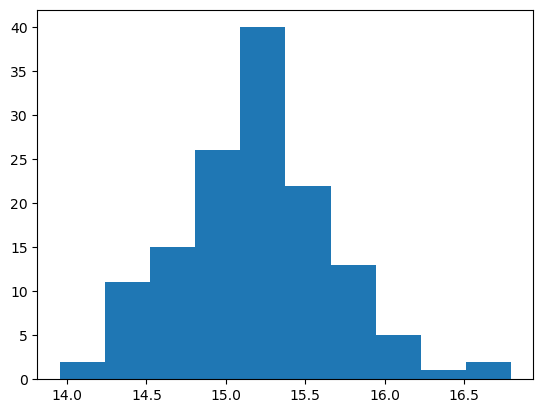

In [27]:
plt.hist(train["revenue"])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9968\3931937387.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["revenue"])


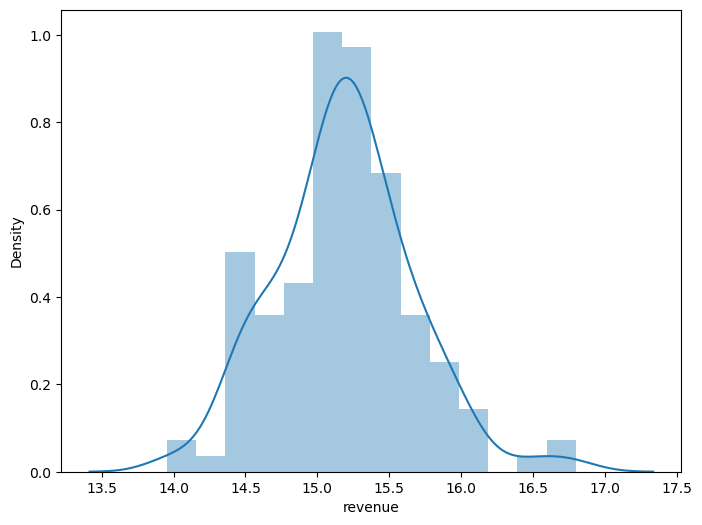

In [28]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.distplot(train["revenue"])
plt.show()

<Axes: xlabel='City', ylabel='count'>

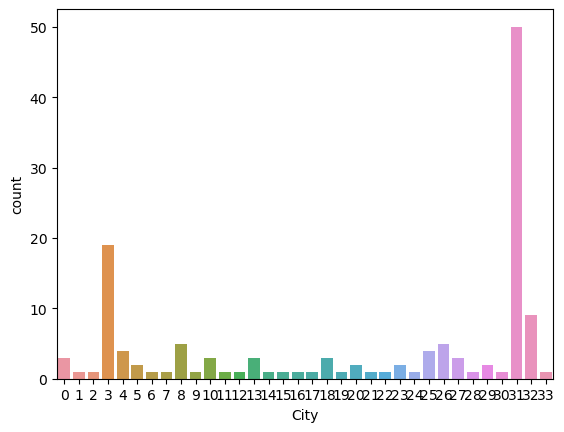

In [29]:
sns.countplot(data =train, x = "City")

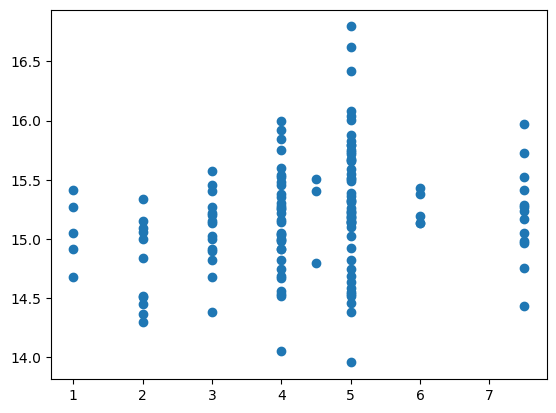

In [30]:
plt.scatter(train["P2"],train["revenue"])

In [40]:
from sklearn.linear_model import LinearRegression

line_reg = LinearRegression()
line_reg.fit(x_train, y_train)
lr_pred = line_reg.predict(x_test)
lr_pred = np.exp(lr_pred)
line_reg.score(x_train, y_train)

0.4331087281162944

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(line_reg, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
print("Cross Validation Scores: ",scores)
print("Average CV Score: ",scores.mean())

Cross Validation Scores:  [-0.39338885 -0.43190616 -0.44948126 -0.39632722 -0.50835593 -0.54464807
 -0.63608633 -0.44438167 -0.36269512 -0.60775981 -0.60494719 -0.6023236
 -0.53592989 -0.37065745 -0.33261569 -0.37174749 -0.8598052  -0.34177092
 -0.39955398 -0.81668011 -0.40948063 -0.40529917 -0.45128105 -0.46909194
 -0.6849416  -0.54975049 -0.36935872 -0.37525377 -0.59678848 -0.5697851 ]
Average CV Score:  -0.4964030970409701


In [41]:
lr_pred

array([4825814.74233124, 3034879.96153574, 1939819.04443612, ...,
       5778509.88065217, 8524453.01855188, 8318582.54513096])

In [37]:
%pip install xgboost

                                              0.0/99.8 MB ? eta -:--:--
                                              0.0/99.8 MB ? eta -:--:--
                                              0.0/99.8 MB ? eta -:--:--
                                             0.0/99.8 MB 186.2 kB/s eta 0:08:56
                                             0.0/99.8 MB 186.2 kB/s eta 0:08:56
                                             0.0/99.8 MB 186.2 kB/s eta 0:08:56
                                             0.0/99.8 MB 122.9 kB/s eta 0:13:32
                                             0.0/99.8 MB 122.9 kB/s eta 0:13:32
                                             0.1/99.8 MB 148.8 kB/s eta 0:11:10
                                             0.1/99.8 MB 148.8 kB/s eta 0:11:10
                                             0.1/99.8 MB 140.3 kB/s eta 0:11:51
                                             0.1/99.8 MB 140.3 kB/s eta 0:11:51
                                             0.1/99.8 MB 154.3 k

     ------------------                     48.5/99.8 MB 680.5 kB/s eta 0:01:16
     ------------------                     48.6/99.8 MB 679.9 kB/s eta 0:01:16
     ------------------                     48.6/99.8 MB 680.6 kB/s eta 0:01:16
     ------------------                     48.6/99.8 MB 679.2 kB/s eta 0:01:16
     ------------------                     48.6/99.8 MB 677.7 kB/s eta 0:01:16
     ------------------                     48.6/99.8 MB 677.1 kB/s eta 0:01:16
     ------------------                     48.7/99.8 MB 675.6 kB/s eta 0:01:16
     ------------------                     48.7/99.8 MB 674.3 kB/s eta 0:01:16
     ------------------                     48.7/99.8 MB 672.9 kB/s eta 0:01:16
     ------------------                     48.7/99.8 MB 672.2 kB/s eta 0:01:16
     ------------------                     48.7/99.8 MB 670.1 kB/s eta 0:01:17
     ------------------                     48.7/99.8 MB 669.4 kB/s eta 0:01:17
     ------------------                 

In [42]:
# check xgboost version
import xgboost
print(xgboost.__version__)

2.0.2


In [47]:
from xgboost import XGBRegressor
# create an xgboost regression model
#model = XGBRegressor()
#model

In [48]:
# create an xgboost regression model
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
print("Cross Validation Scores: ",scores)
print("Average CV Score: ",scores.mean())
#scores = np.absolute(scores)
#print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Cross Validation Scores:  [-0.33202872 -0.45758487 -0.32631446 -0.30178316 -0.35696486 -0.41714585
 -0.53077794 -0.24103426 -0.28412434 -0.32605333 -0.44268802 -0.41176508
 -0.34690971 -0.2551511  -0.33990661 -0.19763248 -0.3334434  -0.26106849
 -0.43062473 -0.37949337 -0.37121748 -0.35189096 -0.39018632 -0.34787964
 -0.36874269 -0.46068678 -0.36337061 -0.31298903 -0.37518363 -0.2964674 ]
Average CV Score:  -0.3537036438402893


In [56]:
#training model
model.fit(x_train, y_train)
xg_pred = model.predict(x_test)
xg_pred = np.exp(xg_pred)
#xg_pred = model.predict(x_test)

In [57]:
xg_pred

array([4638538.5, 3145336.5, 2949964.2, ..., 2484066.8, 3792253. ,
       5083658. ], dtype=float32)